### 1. 밝기 조절

**화소 처리**

* 입력 영상의 특정 좌표 픽셀 값을 변경하여 출력 영상의 해당 좌표 픽셀 값으로 설정하는 연산
  * dst(x, y) = f(src(x, y)), f : 변환 함수
=> 반전, 밝기 조절, 명암비 조절


* 결과 영상 dst의 픽셀 값이 정해진 벙위에 있어야 함 (그레이 스케일)
   * 컬러 영상은 3개의 채널로 구성되어 있기 때문에 3배 많은 메모리와 연산 시간을 필요로 함
   * 컬러 영상도 그레이 스케일 영상으로 변환해서 사용하는 경우가 많음


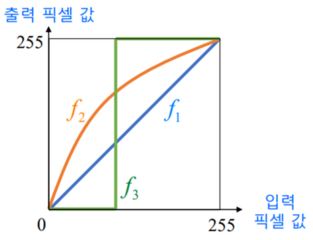

**밝기 조절 수식**

* dst(x, y) = saturate(src(x, y) + n)
   * 입력 영상의 모든 픽셀에 일정 값을 더하거나 빼는 작업 수행 
   * 양수 값을 더하면 밝아지고, 양수 값을 빼면 어두워짐
   * 영상의 픽셀값이 255보다 커지거나 0보다 작아지는 케이스를 방지하고자 포화(saturate)연산 수행
   
   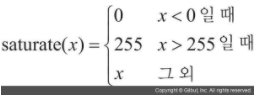
   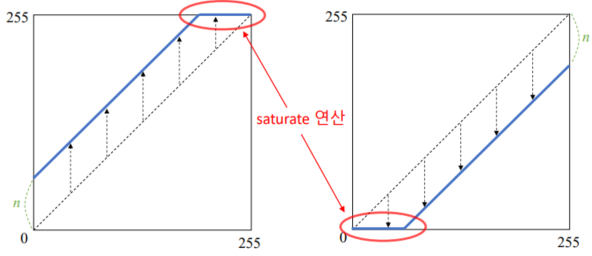

**덧셈 연산 코드**

cv2.add(src1, src2, dst=None, mask=None, dtype=None) => dst

* src1, src2 : 입력 or 스칼라
* dst : 출력
* mask : 마스크 영상
* dtype : 출력 영상 타입


* 스칼라는 실수 값 하나 또는 실수 값 네 개로 구성된 튜플
* dst 크기는 src1, src2와 같아야 하며, 타입이 적절해야 함

In [ ]:
import sys
import numpy as np
import cv2

# 그레이스케일 영상 불러오기
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

dst = cv2.add(src, 100)
#dst = np.clip(src + 100., 0, 255).astype(np.uint8) 
# np.clip(array, min, max)  min보다 작은 값을 min으로 맞추고, max보다 큰 값을 max로 맞춤

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

# 컬러 영상 불러오기
src = cv2.imread('lenna.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

dst = cv2.add(src, (100, 100, 100, 0))
#dst = np.clip(src + 100., 0, 255).astype(np.uint8)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

### 2. 산술 및 논리 연산

**덧셈 연산**

* dst(x, y) = saturate(src1(x, y) + src2(x, y))
  * 두 영상의 같은 위치에 존재하는 픽셀 값을 더하여 결과 영상의 픽셀 값으로 설정
  * 포화 연산 수행
  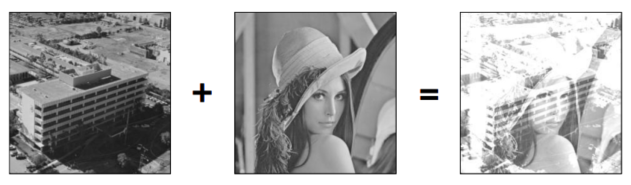

**가중합**

* dst(x, y) = saturate(a*src1(x, y) + b*src2(x, y))
   * 두 영상의 같은 위치에 존재하는 픽셀 값에 대해 가중합 계산
   * a+b=1로 setting, 두 입력 영상의 평균 밝기를 유지
   
   
   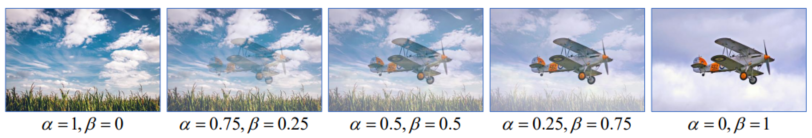

**가중치 합 코드**

cv2.addWeighted(src1, alpha, src2, beta, gamma, dst=None, dtype=None) => dst


* src1 : 첫 번째 입력 영상
* alpha : 첫 번째 영상에 대한 가중치
* src2 : 두 번째 입력 영상
* beta : 두 번째 영상 가중치
* gamma : 결과 영상에 추가적으로 더할 값
* dst : 결과 영상
* dtype : 출력 영상 타입

**뺄셈 연산**


* dst(x, y) = saturate(src1(x, y) - src2(x, y))
   * 두 영상의 같은 위치에 존재하는 픽셀 값에 대해 뺄셈 연산을 수행하여 결과 영상의 픽셀 값으로 설정
   * 뺄셈 결과가 0보다 작으면 픽셀 값을 0으로 설정 (포화)
   
   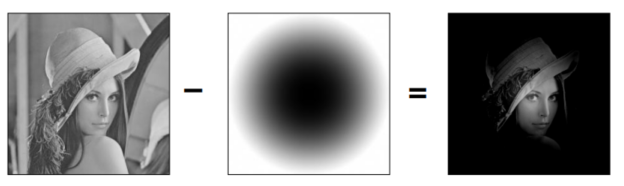
   
   
   * 검은색 부분(0)을 뺄셈하면 원본이 유지, 하얀색 부분(255)를 뺄셈하면 포화 연산에 의해 0으로 설정됨

**뺄셈 연산 코드**


cv2.subtract(src1, src2, dst=None, mask=None, dtype=None) => dst

**차이 연산**

* dst(x, y) = |src1((x, y) - src2(x, y)|
  * 뺄셈과 달리 입력 영상의 순서에 영향을 받지 않음
  
  
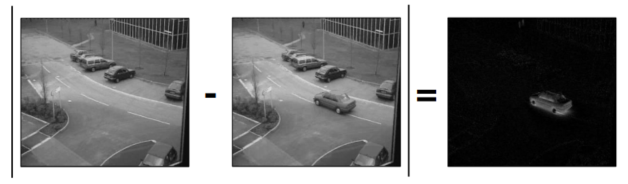

* 나머지 부분의 픽셀값은 서로 똑같아서 차이 연산 수행시 0이 됨, 새롭게 변한 부분만 결과 영상에 표현

**차이 연산 코드**

cv2.absdiff(src1, src2, dst=None)

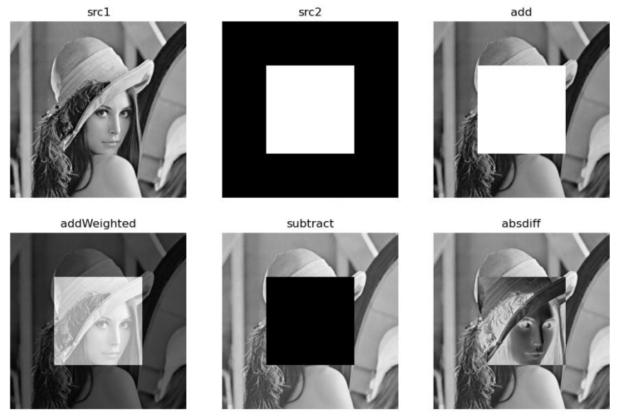


* add : 얼굴 부분은 255가 더해지고 포화 연산에 의해 하얀색(255)로 설정, 나머지는 0을 더하기 때문에 그대로
* addWeighted : 가중치에 의해 얼굴 부분에 255보다 작은 수가 더해지게 됨, 나머지도 가중치에 의해 기존 보다 작은 픽셀값으로 변경되어 밝기가 약해짐
* subtract : 얼굴 부분은 255를 빼기 때문에 0보다 작은 수가 되고 포화 연산에 의해 0(검은색)으로 세팅, 나머지는 0을 빼기 때문에 그대로
* absdiff : 얼굴 부분에서 255를 빼기 때문에 0보다 작은 수가 되지만 절댓값이 취해짐

In [ ]:
import sys
import numpy as np
import cv2
from matplotlib import pyplot as plt


src1 = cv2.imread('lenna256.bmp', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('square.bmp', cv2.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:
    print('Image load failed!')
    sys.exit()

dst1 = cv2.add(src1, src2, dtype=cv2.CV_8U)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

plt.subplot(231), plt.axis('off'), plt.imshow(src1, 'gray'), plt.title('src1')
plt.subplot(232), plt.axis('off'), plt.imshow(src2, 'gray'), plt.title('src2')
plt.subplot(233), plt.axis('off'), plt.imshow(dst1, 'gray'), plt.title('add')
plt.subplot(234), plt.axis('off'), plt.imshow(dst2, 'gray'), plt.title('addWeighted')
plt.subplot(235), plt.axis('off'), plt.imshow(dst3, 'gray'), plt.title('subtract')
plt.subplot(236), plt.axis('off'), plt.imshow(dst4, 'gray'), plt.title('absdiff')
plt.show()

### 3. 컬러 영상과 색 공간

* 컬러 영상은 3차원의 numpy.ndarray  /  img.shape=(h, w, 3)


* RGB가 아니라 BGR 순서

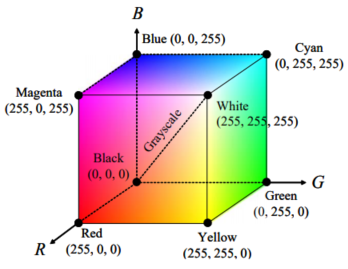

**채널 분리 코드**

cv2.split(m, mv=None) => dst (단일 채널을 가진 배열, 흑백 영상)

* m : 다채널 영상 (B, G, R)로 구성된 컬러 영상
* mv : 출력 영상



**채널 결합 코드**

cv2.merge(mv, dst=None) => dst 

* 분리된 단일 채널 이미지 배열을 병합하여 하나의 영상으로, 순서가 바뀔 경우 원본과 다른 색상으로 표현될 수 있음

In [4]:
import sys
import numpy as np
import cv2


# 컬러 영상 불러오기
src = cv2.imread('candies.png', cv2.IMREAD_COLOR)

if src is None:
    print('Image load failed!')
    sys.exit()

# 컬러 영상 속성 확인
print('src.shape:', src.shape)  # src.shape: (480, 640, 3)
print('src.dtype:', src.dtype)  # src.dtype: uint8

# RGB 색 평면 분할
b_plane, g_plane, r_plane = cv2.split(src)

# 결합
inverse = cv2.merge((r_plane, g_plane, b_plane))  # bgr순서가 아니라 원본과 색상이 달라짐

#b_plane = src[:, :, 0]
#g_plane = src[:, :, 1]
#r_plane = src[:, :, 2]   bgr 순서

cv2.imshow('src', src)
cv2.imshow('B_plane', b_plane)
cv2.imshow('G_plane', g_plane)
cv2.imshow('R_plane', r_plane)
cv2.imshow('inverse', inverse)
cv2.waitKey()

cv2.destroyAllWindows()


src.shape: (480, 640, 3)
src.dtype: uint8


**색 공간 변환 함수 코드**

cv2.cvtColor(src, code, dst=None, dstCn=None) => dst

* src : 입력 영상
* code : 색 변환 코드
* dstCn : 결과 영상의 채널 수. 0이면 자동으로 결정함
* dst : 출력 영상


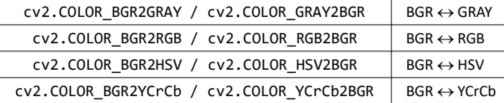

RGB 색상을 그레이 스케일로 변환하면 데이터 저장 용량 감소, 처리 속도 향상의 장점이 있지만 색상 정보가 손실됨

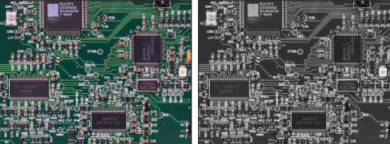

**HSV 색 공간**


* Hue : 색상, 색의 종류  /  Saturation : 채도  /  Value : 밝기


* cv2.CV_8U의 경우 0<=H<=179, 0<=S<=255, 0<=V<=255

**YCrCb 색 공간**

* 컬러 비디오 표준에 사용되는 색 공간


* 영상의 밝기, 색상 정보를 따로 분리하여 부호화


* Y : 밝기 정보(luma)  /  Cr, Cb : 색차(chroma)

### 4. 히스토그램 분석

* 히스토그램
   * 영상의 픽셀 값 분포를 그래프의 형태로 표현
   * 그레이스케일 영상에서 각 그레이스케일 값에 해당하는 픽셀의 개수 분포를 막대 그래프 형태로 시각화
   
   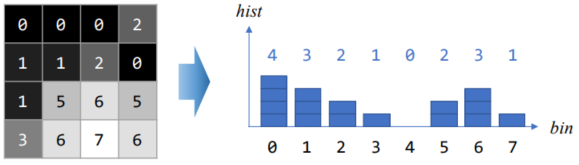
   
   
   
* 그레이 스케일 기준으로는 히스토그램이 256개의 bin을 가져야 함 (0~255)
   * 빈의 개수가 줄어들면 히스토그램이 표현하는 영상의 픽셀 값 분포가 대략적인 형태로 바뀜, 많으면 세밀한 분포 표현이 가능
   
   
   
* 정규화된 히스토그램
   * 각 픽셀의 개수를 영상 전체 픽셀 개수로 나눔
   * 해당 그레이스케일 값을 갖는 픽셀이 나타날 확률
   
   
   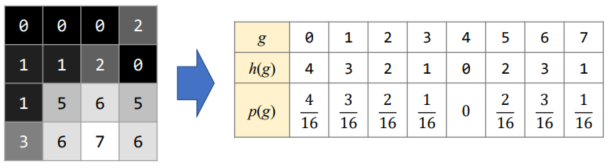

* 영상과 히스토그램의 관계

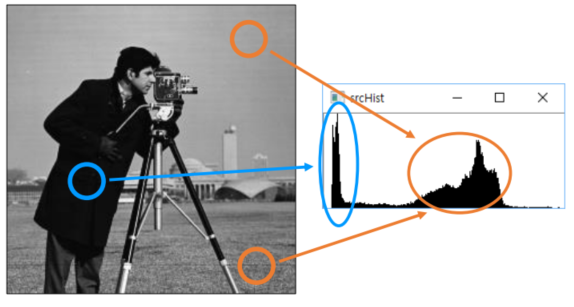


* 파란색 영역은 외투, 머리카락 등 어두운 픽셀 분포를 표현
* 주황색 영역은 하늘, 잔디밭 등 배경의 픽셀로부터 생성

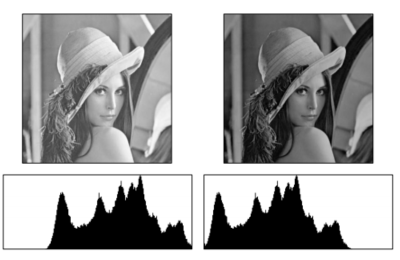


* 밝은 영상은 255, 어두운 영상의 경우 0 부근의 분포가 많은 것을 확인

**히스토그램 계산 코드**

cv2.calcHist(images, channels, mask, histSize, ranges, hist=None, accumulate=None) => hist


* images : 입력 영상 리스트
* channels : 히스토그램을 구할 채널을 나타내는 리스트
* mask : 마스크 영상. 입력 영상 전체에서 히스토그램을 구한다면 None지정
* histSize : bin 개수
* ranges : 히스토그램 각 bin의 최솟값, 최댓값으로 구성된 리스트
* hist : 결과 (ndarray)
* accumullate : 기존의 hist 히스토그램에 누적하면 True 아니면 False

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2


# 그레이스케일 영상의 히스토그램
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

hist = cv2.calcHist([src], [0], None, [256], [0, 256])

cv2.imshow('src', src)
cv2.waitKey(1)

plt.plot(hist)
plt.show()

# 컬러 영상의 히스토그램
src = cv2.imread('lenna.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

colors = ['b', 'g', 'r']
bgr_planes = cv2.split(src)  # 채널 분할

for (p, c) in zip(bgr_planes, colors):
    hist = cv2.calcHist([p], [0], None, [256], [0, 256])
    plt.plot(hist, color=c)

cv2.imshow('src', src)
cv2.waitKey(1)

plt.show()

cv2.destroyAllWindows()

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2


def getGrayHistImage(hist):
    imgHist = np.full((100, 256), 255, dtype=np.uint8)  # 100 x 256

    histMax = np.max(hist)
    for x in range(256):
        pt1 = (x, 100)
        pt2 = (x, 100 - int(hist[x, 0] * 100 / histMax))
        cv2.line(imgHist, pt1, pt2, 0)

    return imgHist


src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

hist = cv2.calcHist([src], [0], None, [256], [0, 256])
histImg = getGrayHistImage(hist)

cv2.imshow('src', src)
cv2.imshow('histImg', histImg)
cv2.waitKey()

cv2.destroyAllWindows()

### 5. 명암비 조절

**명암비 Contrast**
   * 밝은 곳과 어두운 곳 사이에 드러나는 밝기 차이의 강도
   * 영상이 전반적으로 어둡거나 전반적으로 밝은 픽셀로만 구성되면 명암비가 낮음
   * 발근 영역, 어두운 영역이 고루 섞여 있으면 명암비가 높음
   
   
   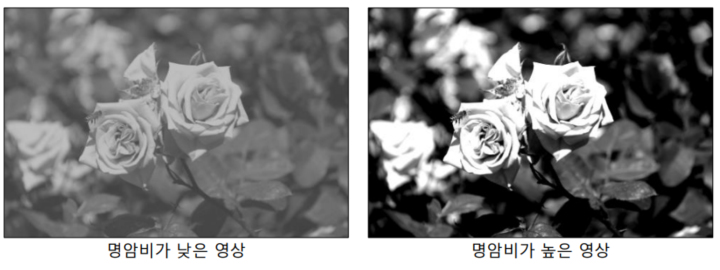

**명암비 조절 함수**

dst(x, y) = saturate(s*src(x, y))


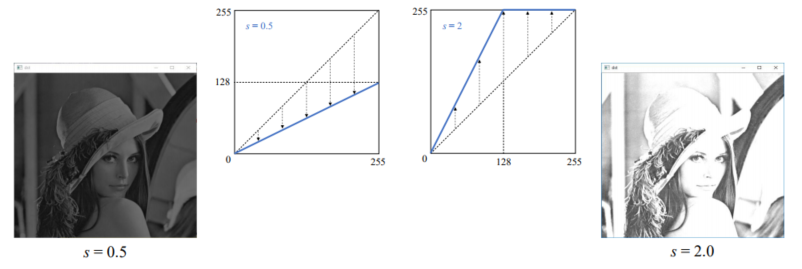

* a=-0.5 : 명암비 감소  /  a=2 : 명암비 증가

**효과적인 명암비 조절**

* 밝은 픽셀은 더욱 밝게, 어두운 픽셀은 더욱 어두워지게 변경
   * 밝고 어둡다는 기준 설정에 따라 명암비 조절 결과 영상의 품질이 달라질 수 있음
   * ex) 128 or 입력 영상의 평균 밝기
   
dst(x, y) = saturate(src(x, y) + (src(x, y) - 128) * a)
* 입력 영상의 픽셀 값이 128보다 크면 더욱 밝게, 128보다 작으면 더욱 작게 => 명암비 증가
* 128보다 큰 입력 영상 픽셀값은 좀 더 작게, 128보다 작은 픽셀값은 128에 가깝게 증가 => 명암비 감소
* -1<=a<=0이면(기울기가 0~1사이) 명암비를 감소, a>0이면(기울기가 1보다 크면) 명암비를 증가

In [9]:
import sys
import numpy as np
import cv2


src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

alpha = 1.0  # 명암비 증가
dst = np.clip((1+alpha)*src - 128*alpha, 0, 255).astype(np.uint8)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

**자동 명암비 조절**

* 히스토그램 스트레칭
  * 보통 명암비가 낮은 영상은 히스토그램이 특정 구간에 집중되어 나타남
  * 영상의 히스토그램이 그레이스케일 전 구간에서 걸쳐 나타나도록 변경하는 선형 변환 기법 => 명암비가 높아짐, 이미지의 품질 향상
  
  
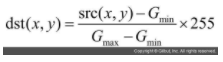
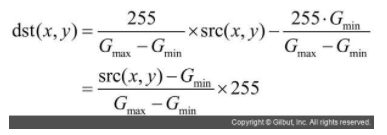
* G_min은 0, G_max은 255가 되도록 변환함
  

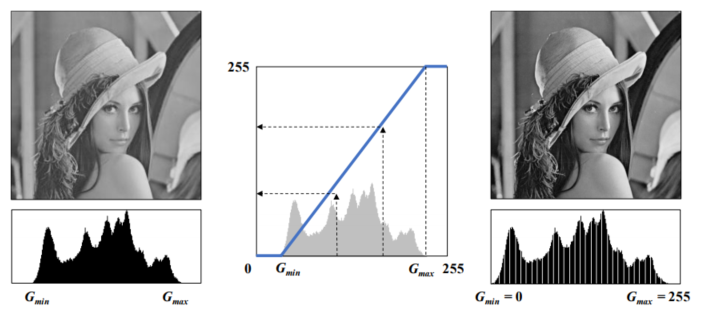

**정규화 함수 코드**

cv2.normalize(src, dst, alpha=None, beta=None, norm_type=None, dtype=None, mask=None) => dst

* alpha : 목표 노름 값(노름 정규화) or 최솟값(범위 정규화)
* beta :         //       or  최댓값(범위 정규화)
* norm_type : 정규화 타입 NORM_INF, NORM_L1, NORM_L2, NORM_MINMAX

In [11]:
import sys
import numpy as np
import cv2

src = cv2.imread('Hawkes.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

gmin, gmax, _, _ = cv2.minMaxLoc(src)
dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)
#dst = ((src - gmin) * 255. / (gmax - gmin)).astype(np.uint8)

cv2.imshow('src', src)
cv2.imshow('dst', dst)  # 명암비가 높은 영상으로(어두운 영역, 밝은 영역이 고루 분포)
cv2.waitKey()

cv2.destroyAllWindows()

### 6. 히스토그램 평활화

* 영상의 픽셀값 분포가 그레이스케일 전체 영역에서 골고루 나타나도록 변경하는 알고리즘
  * 히스토그램 그래프에서 특정 그레이스케일 값 근방에서 픽셀 분포가 많이 뭉쳐 있을 때 이를 넓게 펴줌
  
  
  
* 변환 함수 구하기
   * 히스토그램 함수 구하기
   * 정규화된 히스토그램 함수 구하기
   * 누적 분포 함수 구하기 - 히스토그램 누적 함수를 픽셀 값 변환 함수로 사용함
   
   
   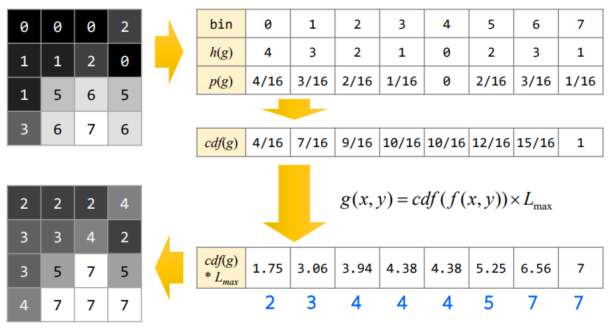
   
   
   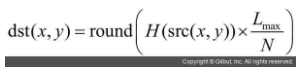
   
   
* H : 히스토그램 누적 함수 / L_max : 영상이 가질 수 있는 최대 밝기 값 (그레이 스케일의 경우 255)
   * 위 예제에서는 L_max=7

**히스토그램 평활화 & 히스토그램 누적 분포 함수와의 관계**

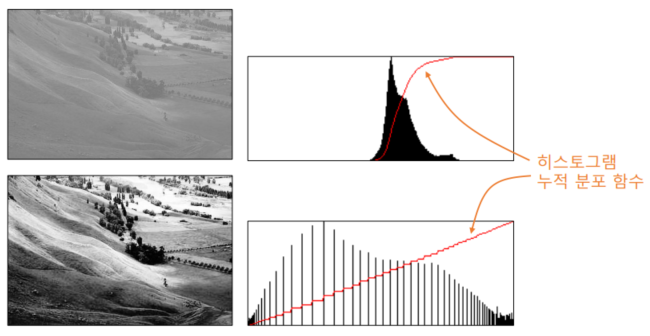

* 평활화 결과 전체적으로 밝은 영역, 어두운 영역의 대비가 크게 증가

**평활화 코드**

cv2.equalizeHist(src, dst=None) => dst

**컬러 영상 히스토그램 평활화**

* 밝기 성분에 대해서만 히스토그램 평활화 수행 (색상 성분 불변)

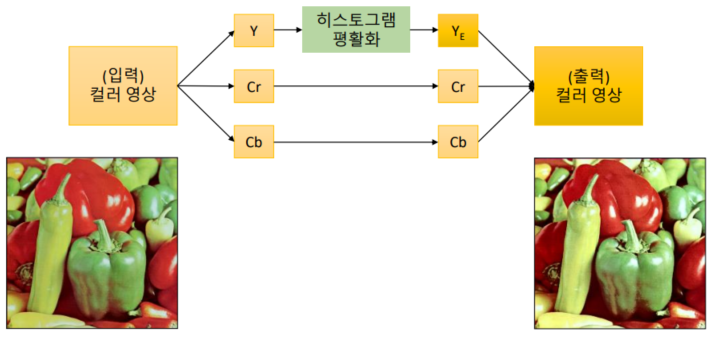

In [14]:
import sys
import numpy as np
import cv2


# 그레이스케일 영상의 히스토그램 평활화
src = cv2.imread('Hawkes.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

dst = cv2.equalizeHist(src)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

# 컬러 영상의 히스토그램 평활화
src = cv2.imread('field.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
ycrcb_planes = cv2.split(src_ycrcb)

# 밝기 성분에 대해서만 히스토그램 평활화 수행
ycrcb_planes[0] = cv2.equalizeHist(ycrcb_planes[0])

dst_ycrcb = cv2.merge(ycrcb_planes)
dst = cv2.cvtColor(dst_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

In [17]:
ycrcb_planes

[array([[187, 187, 190, ..., 169, 164, 161],
        [187, 185, 187, ..., 116, 113, 140],
        [183, 185, 187, ...,  81,  76,  76],
        ...,
        [  4,   8,  15, ...,  15,  21,  55],
        [  3,  14,  13, ...,  14,  16,  24],
        [ 13,  32,  16, ...,  10,  16,  16]], dtype=uint8),
 array([[132, 132, 133, ..., 129, 129, 129],
        [132, 132, 133, ..., 122, 120, 124],
        [134, 133, 132, ..., 116, 119, 112],
        ...,
        [119, 125, 134, ..., 117, 121, 129],
        [119, 132, 131, ..., 118, 119, 124],
        [132, 149, 129, ..., 118, 119, 121]], dtype=uint8),
 array([[129, 126, 127, ..., 131, 131, 131],
        [129, 130, 127, ..., 138, 137, 135],
        [130, 130, 129, ..., 143, 145, 144],
        ...,
        [142, 137, 126, ..., 123, 117,  95],
        [143, 129, 129, ..., 128, 124, 114],
        [130, 109, 123, ..., 135, 125, 123]], dtype=uint8)]

**특정 색상 영역 추출**

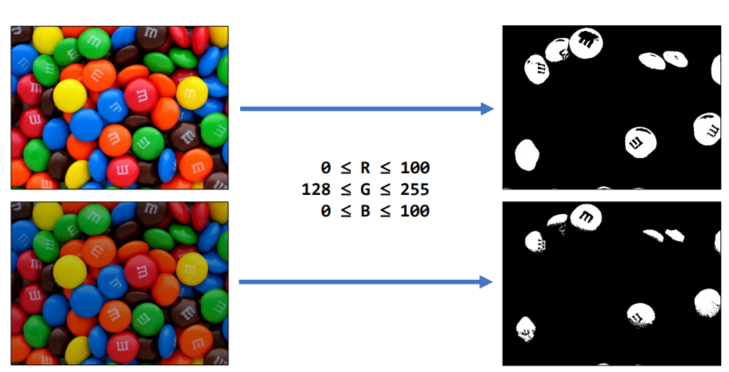

**특정 범위 안에 있는 행렬 원소 검출**

cv2.inrange(src, lowerb, upperb, dst=None) => dst

* lowerb : 하한 값 행렬 or 스칼라
* upperb : 상한 값 행렬 or 스칼라
* dst : 입력 영상과 같은 크기의 마스크 영상(np.uint8), 범위안의 픽셀은 255 나머지는 0으로 설정됨

In [ ]:
import sys
import numpy as np
import cv2


src = cv2.imread('candies.png')  # BGR
#src = cv2.imread('candies2.png')

if src is None:
    print('Image load failed!')
    sys.exit()

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)  # HSV

dst1 = cv2.inRange(src, (0, 128, 0), (100, 255, 100))  # (0<R<100, 128<G<255, 0<B<100) : 녹색 영역
dst2 = cv2.inRange(src_hsv, (50, 150, 0), (80, 255, 255)) # (50<H<80, 150<S<255, 0<V<255) : 녹색 영역

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()

cv2.destroyAllWindows()

In [19]:
import sys
import numpy as np
import cv2


src = cv2.imread('candies.png')

if src is None:
    print('Image load failed!')
    sys.exit()

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

def on_trackbar(pos):  # 트랙바를 이용해서 추출
    hmin = cv2.getTrackbarPos('H_min', 'dst')
    hmax = cv2.getTrackbarPos('H_max', 'dst')

    dst = cv2.inRange(src_hsv, (hmin, 150, 0), (hmax, 255, 255))
    cv2.imshow('dst', dst)


cv2.imshow('src', src)
cv2.namedWindow('dst')

cv2.createTrackbar('H_min', 'dst', 50, 179, on_trackbar)  # hmin~hmax : 50~179
cv2.createTrackbar('H_max', 'dst', 80, 179, on_trackbar)  # hmin~hmax : 80~179
on_trackbar(0)

cv2.waitKey()

cv2.destroyAllWindows()

### 8. 히스토그램 역투영

* 7의 방법은 원색에 가까운 색상을 검출할 때는 효과적이나 사람의 피부 처럼 미세한 변화가 있거나 색상 값을 수치화하기 어려운 경우에는 적합 x
   * 만약 입력 영상에서 찾고자 하는 객체의 기준 영상을 미리 가지고 있으면 컬러 히스토그램 정보를 활용하여 비슷한 색상 영역을 찾을 수 있음
   * 주어진 입력 영상의 각 픽셀이 해당 히스토그램에 부합하는 영역을 찾는 방식


* 주어진 히스토그램 모델과 일치하는 픽셀을 찾아내는 기법

**히스토그램 역투영을 이용한 피부색 검출**

* 기준 영상으로부터 피부색에 대한 컬러 히스토그램을 미리 계산
* 입력 영상에서 미리 구한 피부색 히스토그램에 부합하는 픽셀 선별

**역투영 함수 코드**

cv2.calcBackProject(images, channels, hist, ranges, scale, dst=None) => dst

* images : 입력 영상 리스트
* channels : 역투영 계산에 사용할 채널 번호 리스트
* hist : 입력 히스토그램
* ranges : 히스토그램 각 차원의 최솟값과 최댓값으로 구성된 리스트
* scale : 출력 역투영 행렬에 추가적으로 곱할 값
* dst : 출력 역투영 영상, cv2.CV_8U

In [29]:
import sys
import numpy as np
import cv2


# 입력 영상에서 ROI를 지정하고, 히스토그램 계산

src = cv2.imread('cropland.png')

if src is None:
    print('Image load failed!')
    sys.exit()

x, y, w, h = cv2.selectROI(src)  # 마우스로 ROI 지정

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
crop = src_ycrcb[y:y+h, x:x+w]

channels = [1, 2]
cr_bins = 128
cb_bins = 128
histSize = [cr_bins, cb_bins]
cr_range = [0, 256]
cb_range = [0, 256]
ranges = cr_range + cb_range

hist = cv2.calcHist([crop], channels, None, histSize, ranges)
hist_norm = cv2.normalize(cv2.log(hist+1), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# 입력 영상 전체에 대해 히스토그램 역투영

backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)
dst = cv2.copyTo(src, backproj)  # 역투영 영상에 입력영상 반영

cv2.imshow('backproj', backproj)
cv2.imshow('hist_norm', hist_norm)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
import sys
import numpy as np
import cv2


# CrCb 살색 히스토그램 구하기
ref = cv2.imread('kids1.png', cv2.IMREAD_COLOR)
mask = cv2.imread('kids1_mask.bmp', cv2.IMREAD_GRAYSCALE)

if ref is None or mask is None:
    print('Image load failed!')
    sys.exit()

ref_ycrcb = cv2.cvtColor(ref, cv2.COLOR_BGR2YCrCb)

channels = [1, 2]
ranges = [0, 256, 0, 256]  # 1, 2 차원의 최솟값, 최댓값
hist = cv2.calcHist([ref_ycrcb], channels, mask, [128, 128], ranges)
hist_norm = cv2.normalize(cv2.log(hist + 1), None, 0, 255, 
                          cv2.NORM_MINMAX, cv2.CV_8U)


# 입력 영상에 히스토그램 역투영 적용
src = cv2.imread('kids2.png', cv2.IMREAD_COLOR)

if src is None:
    print('Image load failed!')
    sys.exit()

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)

cv2.imshow('src', src)
cv2.imshow('hist_norm', hist_norm)
cv2.imshow('backproj', backproj)
cv2.waitKey()
cv2.destroyAllWindows()

### 크로마키 합성

In [27]:
import sys
import numpy as np
import cv2


# 녹색 배경 동영상
cap1 = cv2.VideoCapture('C:/Users/ky_moon/Desktop/vision/ch03/woman.mp4')

if not cap1.isOpened():
    print('video open failed!')
    sys.exit()

# 비오는 배경 동영상
cap2 = cv2.VideoCapture('C:/Users/ky_moon/Desktop/vision/ch03/raining.mp4')

if not cap2.isOpened():
    print('video open failed!')
    sys.exit()

# 두 동영상의 크기, FPS는 같다고 가정
frame_cnt1 = round(cap1.get(cv2.CAP_PROP_FRAME_COUNT))
frame_cnt2 = round(cap2.get(cv2.CAP_PROP_FRAME_COUNT))
print('frame_cnt1:', frame_cnt1)
print('frame_cnt2:', frame_cnt2)

fps = cap1.get(cv2.CAP_PROP_FPS)
delay = int(1000 / fps)

# 합성 여부 플래그
do_composit = False

# 전체 동영상 재생
while True:
    ret1, frame1 = cap1.read() # 녹색 배경

    if not ret1:
        break
    
    # do_composit 플래그가 True일 때에만 합성 (스페이스를 누르면)
    if do_composit:
        ret2, frame2 = cap2.read() # 비오는 배경

        if not ret2:
            break

        # HSV 색 공간에서 녹색 영역을 검출하여 합성
        hsv = cv2.cvtColor(frame1, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, (50, 150, 0), (70, 255, 255)) # 초록색 배경은 하얀색, 사람은 검정
        cv2.copyTo(frame2, mask, frame1)  # cv2.copyTo(src, mask, dst=None) -> dst, 비오는 배경의 frame2에 mask를 적용시킨 frame1 반영
        
    cv2.imshow('mask', mask)
    cv2.imshow('frame', frame1)
    key = cv2.waitKey(delay)

    # 스페이스바를 누르면 do_composit 플래그를 변경(크로마키 합성 동작 제어)
    if key == ord(' '):
        do_composit = not do_composit
    elif key == 27:
        break

cap1.release()
cap2.release()
cv2.destroyAllWindows()

frame_cnt1: 409
frame_cnt2: 353
